# Equilibrio entre Sesgo y Varianza

Todos los modelos tienen un error asociado a sus predicciones. Al entrenar modelos con **muestras de una población más grande**, estos siempre reflejarán error debido al muestreo realizado.

- Los modelos **demasiado sencillos**, sufren de error de tipo **sesgo**, en el que NO son sensibles a las variabilidades de la muestra con que se entrenan. Generalizan mejor, memorizan peor, más orientados a predicción.
- Los modelos **demasiado complejos**, sufren de error de tipo **varianza**, en el que son hipersensibles a las variabilidades de la muestra con que se entrenan. Generalizan peor, memorizan mejor, más orientados a análisis.
- Los modelos **equilibrados entre sencillez y complejidad**, tienden a minimizar el error total del modelo. Sin embargo, siempre hay un error irreducible.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

# Creacion de la poblacion

In [2]:
#Intervalo en el rango de -3 a 3 de ancho .01
X = np.arange(-3,3,.01)
#len(X) = 600

#Simplemente me dice generame 600 datos diferentes, no interesa los valores del X
#El operador: _ es para omitir el iterador
ruido = [np.random.normal(loc=0,scale=.3) for _ in X]
#ruido = [np.random.normal(loc=0,scale=.3) for _ in range(600)]

# np.poly1d([coef1,coef2,coef3,....,coefn]) genera una función polinomica de grado (n-1) de 1 variable
# Genera una función polinómica: print(np.poly1d([.03,.02,.01]))
# Para pobrar: sistema1(10), al x le da el valor de 10.
sistema1 = np.poly1d([.03,.02,.01])

# Sistema2 genera una función así: sistema2 = f(x) = sen(x)
sistema2 = np.sin
#print(sistema2(pi/2))

# sistema2(X): pasar la función seno sobre cada valor del array 
poblacion = sistema2(X) + ruido
#len(sistema2(X)): 600

In [3]:
# OBSERVACIONES Dennis
# Sirve para ver como es la función polinomica sistema1
print(np.poly1d(sistema1))
#sistema1(10):3.21

      2
0.03 x + 0.02 x + 0.01


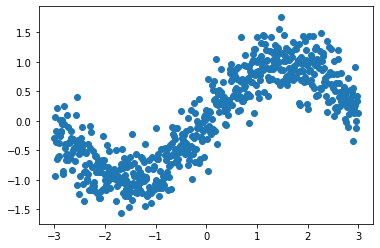

In [4]:
plt.scatter(X, poblacion)

## Muestreo inicial

In [5]:
# Poblacion and X tienen la misma cantidad de datos
# Choice: escojes valores de una muestra de un rango especifico
# Para nuestro casos equivalen a posiciones escogidas al azar para el array X

muestra_i = np.random.choice(list(range(len(poblacion))),20)

# Ojo: 'numpy.ndarray' object has no attribute 'sort_values'
# Para ordenar en array:
muestra_i = np.sort(muestra_i)
# Se ordena de menor a mayor

muestra_i

array([  4,  24,  67,  70, 127, 165, 174, 201, 280, 349, 373, 394, 430,
       435, 472, 479, 481, 536, 551, 585])

In [6]:
# OBSERVACIONES DENNIS
# Sirve para ver como recuperar los datos de un array

z = np.array([10,20,3,2,12])
n = np.array([1,4])
z[n] # Te devuelve los valores


# Similar a:
# x = np.array([1,2,3,4])
# x[[0,3]]

array([20, 12])

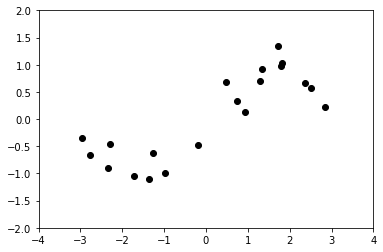

In [7]:
# c = "k", es un color

plt.scatter(X[muestra_i],poblacion[muestra_i],c="k")
plt.ylim(-2,2)
plt.xlim(-4,4)
plt.show()

## Entrenamiento de modelos y representar predicción

Entrenamos modelos que se ajusten a las muestras extraidas de la población

In [8]:
# Un modelo sencillo

# x[muestra_i] son los features y población[muestra_i] es el Y.
# polyfit: Te halla los coeficientes de una función polinomial
# Tener en cuenta que no necesiaramente una relación lineal existe entre este conjunto de datos
Z_simple = np.polyfit(X[muestra_i], poblacion[muestra_i],1)
#Te convierte a una ecuación en base a los coeficientes hallados.
#z_simple es como si fuera un predict()
Z_simple = np.poly1d(Z_simple)
print(Z_simple)

# Tener en cuenta que no necesiaramente una relación polinomial de grado 3 existe entre este conjunto de datos
# Un modelo balanceado
Z_balanced = np.polyfit(X[muestra_i], poblacion[muestra_i],3)
#Te convierte a una ecuación en base a los coeficientes hallados.
Z_balanced = np.poly1d(Z_balanced)
print(Z_balanced)

#un modelo complejo
Z_complex = np.polyfit(X[muestra_i], poblacion[muestra_i],50)
#Te convierte a una ecuación en base a los coeficientes hallados.
Z_complex = np.poly1d(Z_complex)
print(Z_complex)

 
0.3407 x + 0.01209
          3            2
-0.08561 x + 0.004012 x + 0.8166 x - 0.08092
            50             49            48             47
-5.207e-19 x  - 2.868e-18 x  - 4.57e-18 x  - 2.213e-17 x 
              46             45             44             43
 - 3.795e-17 x  - 1.585e-16 x  - 2.905e-16 x  - 9.902e-16 x 
              42            41             40             39
 - 1.933e-15 x  - 4.38e-15 x  - 9.259e-15 x  + 5.495e-15 x 
              38             37             36             35
 + 4.911e-15 x  + 4.651e-13 x  + 9.056e-13 x  + 7.621e-12 x 
              34             33             32             31
 + 1.539e-11 x  + 9.128e-11 x  + 1.842e-10 x  + 8.878e-10 x 
              30             29             28             27
 + 1.727e-09 x  + 6.769e-09 x  + 1.182e-08 x  + 3.085e-08 x 
              26             25             24             23
 + 3.231e-08 x  - 1.277e-07 x  - 5.536e-07 x  - 4.756e-06 x 
              22             21             20          

/Users/dennis/virtualenvs/jupyter/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
# Le estoy pasando un vector de valores de: [muestra_i] para dada la ecuación hallar un Y estimado
# Estos valores estimados se guardan en: Y_simple

Y_simple = Z_simple(X[muestra_i])
Y_balanced = Z_balanced(X[muestra_i])
Y_complex = Z_complex(X[muestra_i])

#Ojo: Estoy estimando  con los mismos datos que entrené

[-2.96 -2.76 -2.33 -2.3  -1.73 -1.35 -1.26 -0.99 -0.2   0.49  0.73  0.94
  1.3   1.35  1.72  1.79  1.81  2.36  2.51  2.85]
--------
[-0.99642276 -0.92828002 -0.78177312 -0.77155171 -0.5773449  -0.44787369
 -0.41720946 -0.32521676 -0.05605293  0.17903953  0.26081082  0.3323607
  0.45501764  0.47205332  0.59811739  0.62196735  0.62878163  0.81617417
  0.86728122  0.98312388]


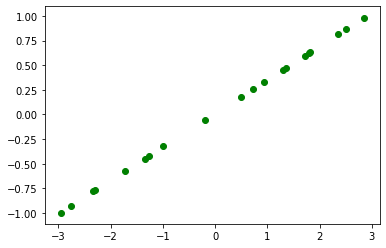

In [10]:

# Realizas un scatterplot de los valores X[muestra_i] y el Y_simple estimado.
plt.scatter(X[muestra_i], Y_simple, c="g")
print(X[muestra_i])
print("--------")
print(Y_simple)

#Par: (-2.76,-072);();();();..

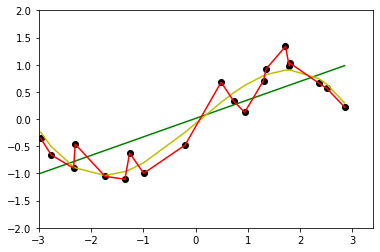

In [11]:
# Realizas un scatterplot de los valores X[muestra_i] y el Y estimado.
plt.scatter(X[muestra_i], poblacion[muestra_i], c="k")
# El plot te une la secuencia de los puntos que son pares ordenados
plt.plot(X[muestra_i], Y_simple, c="g")
plt.plot(X[muestra_i], Y_balanced, c="y")
plt.plot(X[muestra_i], Y_complex, c="r")

plt.ylim(-2,2)
plt.xlim(-3,3.4)

plt.show()


- Primera aproximación, modelo más simple asume que los datos son incrementales, mínima precisión en esta muestra.
**(No captura toda la complejidad del modelo, por lo tanto se presenta el error del Sesgo. A mayor sesgo(BIAS) poca exactitud, los valores encontrados estan muy alejados de un valor referencial)**

- Segunda aproximación, modelo intermedio, sensible a la **forma** de los datos.  

- Tercera aproximación, modelo más complejo, hipersensible a la forma de los datos, máxima precisión en esta muestra.
**(Captura toda la complejidad por lo tanto se presenta el error de variación. Frente a nuevos casos(Nuevos datos de entrenamiento, Test) los valores hallados estarán muy dispersos, es decir tendrá baja precisión)**

## Estudio de los modelos

Para ver como responderían estos modelos ante todas las entradas de X (NO de la poblacion), dibujamos los modelos completamente.

In [12]:
# Toma toda la data de X (Datos con los que entrene así como con los datos que no entrené)
# No solo la muestra obtenida a partir de X

Y_simple_ = Z_simple(X)
Y_balanced_ = Z_balanced(X)
Y_complex_ = Z_complex(X)

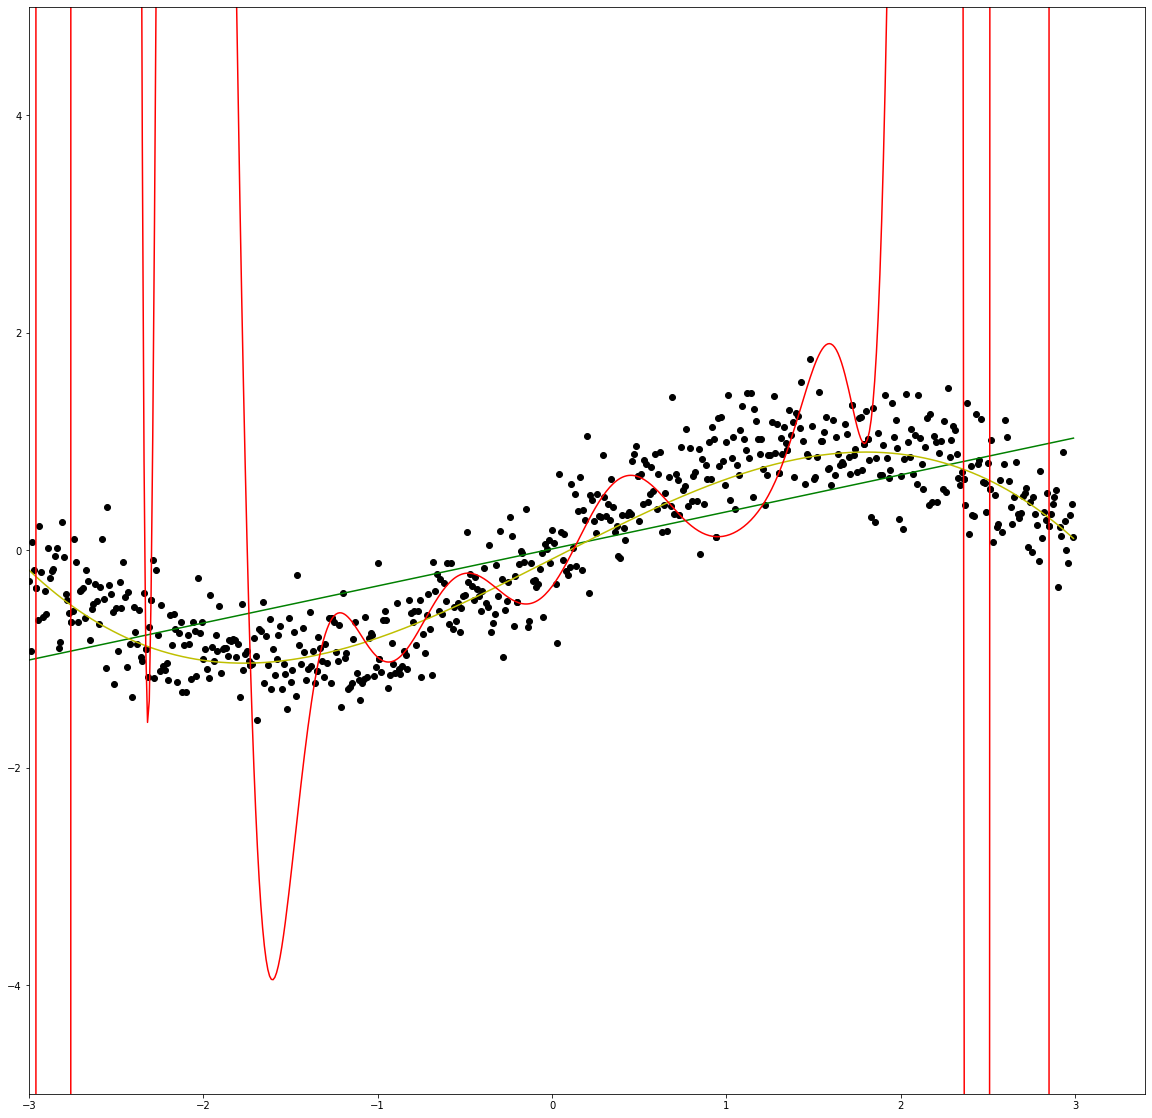

In [13]:
plt.figure(figsize = (20,20))

# Scatter de los puntos utilizados para entrenar
plt.scatter(X[muestra_i], poblacion[muestra_i], c="k")
# Scatter de todos los valores de X
plt.scatter(X, poblacion, c="k")

plt.plot(X, Y_simple_, c="g")
plt.plot(X, Y_balanced_,c ="y")
plt.plot(X, Y_complex_, c="r")
plt.ylim(-5,5)
plt.xlim(-3,3.4)
plt.show()

# ¿Que se interpreta? #

## Errores

In [14]:
#Calculando el error del entrenamiento (Y_simple: Y de entrenamiento, Y real: poblacion[muestra_i])
#abs: Valor absoluto
error_simple = abs(Y_simple-poblacion[muestra_i])
error_balanced = abs(Y_balanced-poblacion[muestra_i])
error_complex = abs(Y_complex-poblacion[muestra_i])

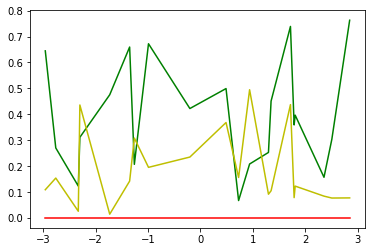

In [15]:
# Este plot de los pares ordenados tiene los mismos valores de X[muestra_i]
# Lo que cambia son los valores de Error.

# EL lineal tiene más error
# EL rojo: no tiene mucho error

plt.plot(X[muestra_i], error_simple,c="g")
plt.plot(X[muestra_i], error_balanced,c="y")
plt.plot(X[muestra_i], error_complex,c="r")
plt.show()

In [28]:
# Se le saca la raíz cuadrada de la media de los error


from sklearn.metrics import mean_squared_error 
from math import sqrt 

#Realmente debería llamarse root_mean_squared_error
rms_simple = sqrt(mean_squared_error(poblacion[muestra_i], Y_simple)) 
print(rms_simple)
rms_balanced = sqrt(mean_squared_error(poblacion[muestra_i], Y_balanced)) 
print(rms_balanced)
rms_complex = sqrt(mean_squared_error(poblacion[muestra_i], Y_complex)) 
print(rms_complex*100000000) #Error bien bajo

0.448983608240918
0.23352717521520874
0.02193568102285976


In [17]:
#Observaciones
cc = [rms_simple,rms_balanced,rms_complex*100000000]
cc

[0.448983608240918, 0.23352717521520874, 0.02193568102285976]

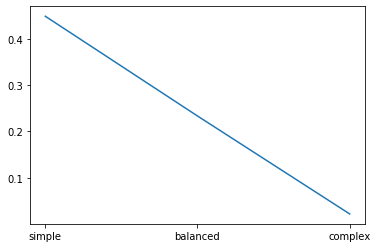

In [18]:
plt.plot(['simple','balanced','complex'],cc)

Text(0.5, 1.0, 'Los valores hallados')

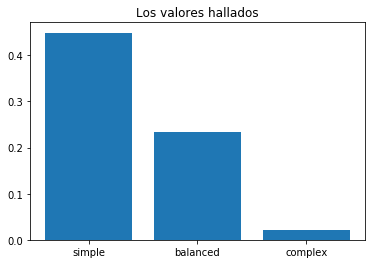

In [19]:
plt.bar(['simple','balanced','complex'],cc)
plt.title("Los valores hallados")

Text(0.5, 1.0, 'Los valores hallados')

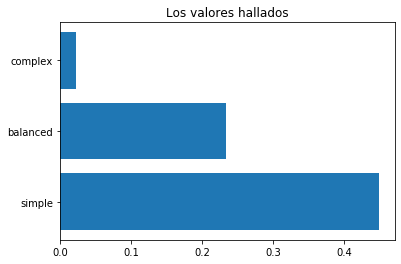

In [20]:
plt.barh(['simple','balanced','complex'],cc)
plt.title("Los valores hallados")

Text(0.5, 1.0, 'Los valores hallados')

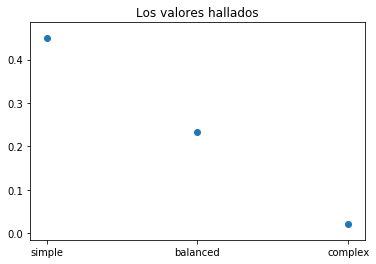

In [21]:
plt.scatter(['simple','balanced','complex'],cc)
plt.title("Los valores hallados")

Text(0.5, 1.0, 'Los valores hallados')

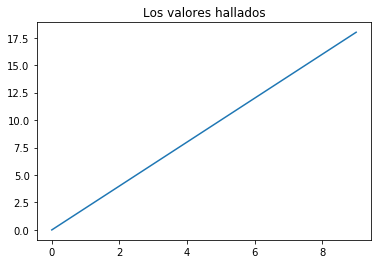

In [22]:
# Analizar la gráfica:
# En este caso los X son las posiciones y el Y son los valores del array
plt.plot(list(range(0,20,2)))
plt.title("Los valores hallados")

El modelo que menor error comete en la muestra usada (conjunto de entreamiento) es el más complejo. Podemos utilizar los coeficientes para analizar esta muestra.

# Nuevos datos

Con una nueva muestra de la población, evaluamos los modelos generados.  
Para ello tomamos 20 nuevos indices de la poblacion, y realizamos predicciones con los modelos creados.

In [23]:
muestra_new = np.random.choice(list(range(len(poblacion))),20)
muestra_new = np.sort(muestra_new)
muestra_new

array([  7,  22,  75, 143, 190, 196, 196, 201, 207, 212, 216, 354, 380,
       386, 406, 427, 446, 540, 549, 565])

In [24]:
# Estoy prediciendo nuevos valores (Y') con la función hallada para nuevos casos [muestra_new]
# ¿Ahora como sale el modelo complejo con data que nunca vio ?

Y_simple_new = Z_simple(X[muestra_new])
Y_balanced_new = Z_balanced(X[muestra_new])
Y_complex_new = Z_complex(X[muestra_new])

Representamos las predicciones de los modelos para la nueva muestra.

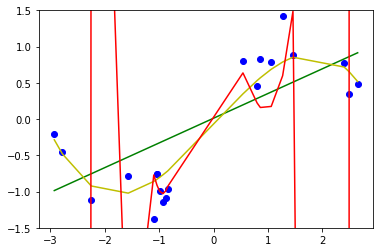

In [25]:
plt.scatter(X[muestra_new], poblacion[muestra_new] ,c="b")
plt.plot(X[muestra_new], Y_simple_new ,c="g")
plt.plot(X[muestra_new], Y_balanced_new ,c="y")
plt.plot(X[muestra_new], Y_complex_new ,c="r")
plt.ylim(-1.5,1.5)
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
rms_simple = sqrt(mean_squared_error(poblacion[muestra_new], Y_simple_new)) 
print(rms_simple)
rms_balanced = sqrt(mean_squared_error(poblacion[muestra_new], Y_balanced_new)) 
print(rms_balanced)
rms_complex = sqrt(mean_squared_error(poblacion[muestra_new], Y_complex_new)) 
print(rms_complex)

0.594580851765798
0.2765104093694595
2433.364827658069


El modelo más complejo es el que comete más error al recibir nuevos datos. Los modelos más sencillos son también más robustos. 
> Por tanto para predicción es mejor **modelos que generalicen bien, sin perder la sensibilidad a la forma**.